In [1]:
import warnings
from IPython.display import display, Latex
from IPython.display import Markdown as md
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from XPLAIN_class import *
from XPLAIN_util import *

### Explaining individual predictions
Explanations of instance x with respect to any arbitrary target class c

In [4]:
x=XPLAIN_util()
e=Explanation_w()
display(md("Zoo dataset - RF classifier"))
x.interactiveDatasetClassifierSelection()

Zoo dataset - RF classifier

Label(value='Select dataset and classifier:')

Button(description='Select', style=ButtonStyle())

In [7]:
%timeit explainer = XPLAIN_explainer("datasets/adult_d.arff", [], "nb", trainExplainSet=True)

4.51 s ± 5.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Instances in the explain dataset

In [8]:
xPzooRF.showExplainDatasetTabularForm().head()

,sex,workclass,education,race,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,age,class
id,,,,,,,,,,,,
0,Female,Private,Dropout,Black,Widowed,Blue-Collar,Unmarried,low,low,39.5-40.5,>=51,<=50K
1,Male,Private,High-School-grad,White,Separated,Blue-Collar,Not-in-family,low,low,>=50.5,26-33,<=50K
7,Male,Self-emp-inc,High-School-grad,White,Never-married,Sales,Not-in-family,low,low,40.5-50.5,26-33,<=50K
8,Male,Private,High-School-grad,White,Married,Other,Husband,low,low,39.5-40.5,26-33,<=50K
10,Male,Local-gov,High-School-grad,White,Married,Other,Husband,low,low,>=50.5,>=51,<=50K


In [ ]:
#Explanation of instance "0"="aardvard" of the zoo dataset for the RF classifier with respect to the predicted class (default)

Explanation with respect to the predicted class

In [ ]:
xPzooRF=deepcopy(x.getXPLAIN_obj())
%matplotlib inline
e.interactiveGetExplanation(xPzooRF)

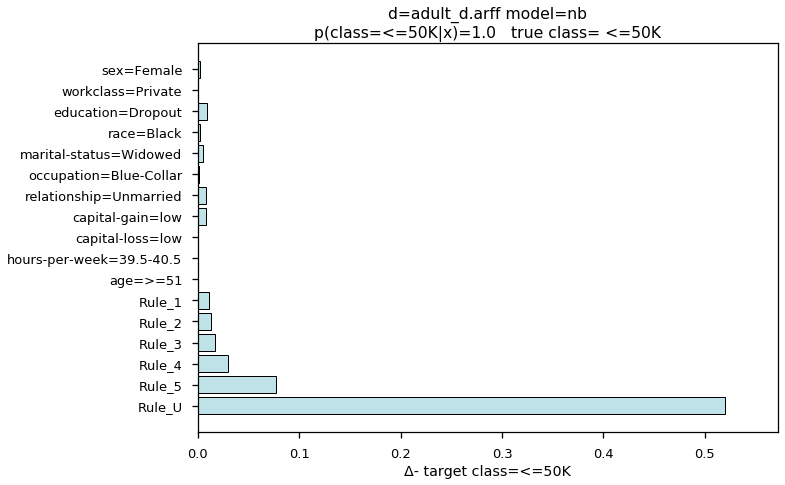


Local rules:
Rule_1  ->  {workclass=Private, relationship=Unmarried}
Rule_2  ->  {workclass=Private, education=Dropout}
Rule_3  ->  {race=Black, capital-gain=low}
Rule_4  ->  {marital-status=Widowed, capital-gain=low}
Rule_5  ->  {sex=Female, relationship=Unmarried, capital-gain=low}
Union of rule bodies:
Rule_U  ->  {sex=Female, workclass=Private, education=Dropout, race=Black, marital-status=Widowed, relationship=Unmarried, capital-gain=low}


In [9]:
%matplotlib inline
#Demo purposes
if e.getExpl()==None:
    exp1=deepcopy(e.def_Explanation(xPzooRF))
else:
    exp1=deepcopy(e.getExpl())

In [ ]:
%matplotlib inline
display(md("Explanation with respect to user defined target class"))
e=Explanation_w()
e.interactiveGetExplanation(xPzooRF)

In [ ]:
%matplotlib inline
#Demo purposes
if e.getExpl()==None:
    exp2=deepcopy(e.def_Explanation(xPzooRF, targetClass=">50K"))
else:
    exp2=deepcopy(e.getExpl())

In [ ]:
exp2=deepcopy(e.getExpl())
display(md("By selecting two target classes, it is possible to obtain the explanation for each class and inspect different behaviors "))
xPzooRF.interactiveTargetClassComparison(str(exp2.n_inst))